In [30]:
#load libraries
import numpy as np
import math
from math import sqrt
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
%matplotlib inline
from statistics import mean
from scipy.stats import norm, lognorm
import seaborn as sns
sns.set()
sns.set_style('white')
from sklearn.neighbors import NearestNeighbors
from scipy.spatial import distance, Voronoi, voronoi_plot_2d, ConvexHull, Delaunay
from collections import defaultdict
import itertools
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import random
import sys
from itertools import combinations 
import time

In [31]:
#load data
raw_data = np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(0,1,2,3,4,8))
raw_data_copy=np.copy(raw_data)

In [32]:
def standard_misorientation(euler_one, euler_two):
    #orientation matrices
    g_one=np.array([[((math.cos(euler_one[0]))*(math.cos(euler_one[2]))-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[0]))*(math.cos(euler_one[2]))+(math.cos(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[2]))*(math.sin(euler_one[1])))],
                [(-(math.cos(euler_one[0]))*(math.sin(euler_one[2]))-(math.sin(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),(-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))+(math.cos(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),((math.cos(euler_one[2]))*(math.sin(euler_one[1])))],
                [((math.sin(euler_one[0]))*(math.sin(euler_one[1]))),(-(math.cos(euler_one[0]))*(math.sin(euler_one[1]))),(math.cos(euler_one[1]))]        
                ])
   
    #euler_two
    g_two=np.array([[((math.cos(euler_two[0]))*(math.cos(euler_two[2]))-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[0]))*(math.cos(euler_two[2]))+(math.cos(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[2]))*(math.sin(euler_two[1])))],
                [(-(math.cos(euler_two[0]))*(math.sin(euler_two[2]))-(math.sin(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),(-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))+(math.cos(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),((math.cos(euler_two[2]))*(math.sin(euler_two[1])))],
                [((math.sin(euler_two[0]))*(math.sin(euler_two[1]))),(-(math.cos(euler_two[0]))*(math.sin(euler_two[1]))),(math.cos(euler_two[1]))]        
                ])
    
    #misorientation matrix
    delta_g=np.matmul(g_two,np.linalg.inv(g_one))
       
#     theta=np.arccos((np.trace(delta_g)-1)/2)
    
    #misorientation angle
    #error handling for rounding errors outside of domain
    try:
        theta=math.acos((delta_g[0,0]+delta_g[1,1]+delta_g[2,2]-1)/2)
    except:
        if (((delta_g[0,0]+delta_g[1,1]+delta_g[2,2]-1)/2)>1):
            theta=0
        else:
            theta=180

    return math.degrees(theta)
#     return (np.trace(delta_g)-1)/2
#     return np.arccos((np.trace(delta_g)-1)/2)


In [33]:
# euler_one=[math.radians(90),math.radians(35),math.radians(45)] #copper
# euler_two=[math.radians(59),math.radians(37),math.radians(63)] #S3
# print(standard_misorientation(euler_one,euler_two))

#example from powerpoint
euler_one=[math.radians(90),math.radians(35),math.radians(45)] #copper1
euler_two=[math.radians(270),math.radians(35),math.radians(45)] #copper2
print(standard_misorientation(euler_one,euler_two))

180.0


In [34]:
#all 24 cubic symmetry operators
op1=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
op2=np.array([[0, 0, -1],[0, -1, 0],[-1, 0, 0]])
op3=np.array([[0, 0, 1],[1, 0, 0],[0, 1, 0]])
op4=np.array([[0, 0, 1],[0, -1, 0],[1, 0, 0]])
op5=np.array([[0, 1, 0],[0, 0, 1],[1, 0, 0]])
op6=np.array([[0, 0, 1],[0, 1, 0],[-1, 0, 0]])
op7=np.array([[0, -1, 0],[0, 0, 1],[-1, 0, 0]])
op8=np.array([[0, 0, -1],[0, 1, 0],[1, 0, 0]])
op9=np.array([[0, -1, 0],[0, 0, -1],[1, 0, 0]])
op10=np.array([[-1, 0, 0],[0, 0, -1],[0, -1, 0]])
op11=np.array([[0, 1, 0],[0, 0, -1],[-1, 0, 0]])
op12=np.array([[1, 0, 0],[0, 0, -1],[0, 1, 0]])
op13=np.array([[0, 0, -1],[1, 0, 0],[0, -1, 0]])
op14=np.array([[1, 0, 0],[0, 0, 1],[0, -1, 0]])
op15=np.array([[0, 0, -1],[-1, 0, 0],[0, 1, 0]])
op16=np.array([[-1, 0, 0],[0, 0, 1],[0, 1, 0]])
op17=np.array([[0, 0, 1],[-1, 0, 0],[0, -1, 0]])
op18=np.array([[0, -1, 0],[-1, 0, 0],[0, 0, -1]])
op19=np.array([[-1, 0, 0],[0, 1, 0],[0, 0, -1]])
op20=np.array([[0, 1, 0],[-1, 0, 0],[0, 0, -1]])
op21=np.array([[-1, 0, 0],[0, -1, 0],[0, 0, 1]])
op22=np.array([[0, 1, 0],[1, 0, 0],[0, 0, -1]])
op23=np.array([[1, 0, 0],[0, -1, 0],[0, 0, -1]])
op24=np.array([[0, -1, 0],[1,  0, 0],[0,  0, 1]])

#iterable list of sym ops from https://github.com/stabix/stabix/blob/master/crystallo/sym_operators.m
cubic_sym_ops=[op1,op2,op3,op4,op5,op6,op7,op8,op9,op10,op11,op12,op13,op14,op15,op16,op17,op18,op19,op20,op21,op22,op23,op24] 

In [35]:
a=sqrt(0.75)

#12 hexagonal close-packed crystal symmetry operators
op25=np.array([[1, 0, 0],[0, 1, 0],[0, 0, 1]])
op26=np.array([[-0.5, a, 0],[-a, -0.5, 0],[0, 0, 1]])
op27=np.array([[-0.5, -a, 0],[a, -0.5, 0],[0, 0, 1]])
op28=np.array([[0.5, a, 0],[-a, 0.5, 0],[0, 0, 1]])
op29=np.array([[-1, 0, 0],[0, -1, 0],[0, 0, 1]])
op30=np.array([[0.5, -a, 0],[a, 0.5, 0],[0, 0, 1]])
op31=np.array([[-0.5, -a, 0],[-a, 0.5, 0],[0, 0, -1]])
op32=np.array([[1, 0, 0],[0, -1, 0],[0, 0, -1]])
op33=np.array([[-0.5, a, 0],[a, 0.5, 0],[0, 0, -1]])
op34=np.array([[0.5, a, 0],[a, -0.5, 0],[0, 0, -1]])
op35=np.array([[-1, 0, 0],[0, 1, 0],[0, 0, -1]])
op36=np.array([[0.5, -a, 0],[-a, -0.5, 0],[0, 0, -1]])

op25,op26,op27,op28,op29,op30,op31,op32,op33,op34,op35,op36

#list of hexagonal sym ops
hex_sym_ops=[op25,op26,op27,op28,op29,op30,op31,op32,op33,op34,op35,op36]

for sym_op in hex_sym_ops:
    print(sym_op)

[[1 0 0]
 [0 1 0]
 [0 0 1]]
[[-0.5        0.8660254  0.       ]
 [-0.8660254 -0.5        0.       ]
 [ 0.         0.         1.       ]]
[[-0.5       -0.8660254  0.       ]
 [ 0.8660254 -0.5        0.       ]
 [ 0.         0.         1.       ]]
[[ 0.5        0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]
 [ 0.         0.         1.       ]]
[[-1  0  0]
 [ 0 -1  0]
 [ 0  0  1]]
[[ 0.5       -0.8660254  0.       ]
 [ 0.8660254  0.5        0.       ]
 [ 0.         0.         1.       ]]
[[-0.5       -0.8660254  0.       ]
 [-0.8660254  0.5        0.       ]
 [ 0.         0.        -1.       ]]
[[ 1  0  0]
 [ 0 -1  0]
 [ 0  0 -1]]
[[-0.5        0.8660254  0.       ]
 [ 0.8660254  0.5        0.       ]
 [ 0.         0.        -1.       ]]
[[ 0.5        0.8660254  0.       ]
 [ 0.8660254 -0.5        0.       ]
 [ 0.         0.        -1.       ]]
[[-1  0  0]
 [ 0  1  0]
 [ 0  0 -1]]
[[ 0.5       -0.8660254  0.       ]
 [-0.8660254 -0.5        0.       ]
 [ 0.         0.        -1

In [36]:
#input is an array in radians as follows euler=[angle_one,angle_two,angle_three]
def misorientation(euler_one, euler_two,sym_op):
    #orientation matrices
    g_one=np.array([[((math.cos(euler_one[0]))*(math.cos(euler_one[2]))-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[0]))*(math.cos(euler_one[2]))+(math.cos(euler_one[0]))*(math.sin(euler_one[2]))*(math.cos(euler_one[1]))),((math.sin(euler_one[2]))*(math.sin(euler_one[1])))],
                [(-(math.cos(euler_one[0]))*(math.sin(euler_one[2]))-(math.sin(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),(-(math.sin(euler_one[0]))*(math.sin(euler_one[2]))+(math.cos(euler_one[0]))*(math.cos(euler_one[2]))*(math.cos(euler_one[1]))),((math.cos(euler_one[2]))*(math.sin(euler_one[1])))],
                [((math.sin(euler_one[0]))*(math.sin(euler_one[1]))),(-(math.cos(euler_one[0]))*(math.sin(euler_one[1]))),(math.cos(euler_one[1]))]        
                ])
   
    #euler_two
    g_two=np.array([[((math.cos(euler_two[0]))*(math.cos(euler_two[2]))-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[0]))*(math.cos(euler_two[2]))+(math.cos(euler_two[0]))*(math.sin(euler_two[2]))*(math.cos(euler_two[1]))),((math.sin(euler_two[2]))*(math.sin(euler_two[1])))],
                [(-(math.cos(euler_two[0]))*(math.sin(euler_two[2]))-(math.sin(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),(-(math.sin(euler_two[0]))*(math.sin(euler_two[2]))+(math.cos(euler_two[0]))*(math.cos(euler_two[2]))*(math.cos(euler_two[1]))),((math.cos(euler_two[2]))*(math.sin(euler_two[1])))],
                [((math.sin(euler_two[0]))*(math.sin(euler_two[1]))),(-(math.cos(euler_two[0]))*(math.sin(euler_two[1]))),(math.cos(euler_two[1]))]        
                ])
    
#     #misorientation matrix
    delta_g=np.matmul(g_one,np.linalg.inv(g_two))
    
    #disorientation matrix
    #problem here!!!
#     delta_gd=np.matmul((np.matmul(g_two,sym_op)),(np.matmul(np.linalg.inv(sym_op),np.linalg.inv(g_one))))
    #formula from powerpoint
    delta_gd=np.matmul(sym_op,delta_g)
    
#     #angle in radians
#     theta=np.arccos((np.trace(delta_gd)-1)/2)
    
    #misorientation angle
    try:
        theta=np.arccos((np.trace(delta_gd)-1)/2)
    #error handling for rounding errors outside of domain
    except:
        if (((np.trace(delta_gd)-1)/2)>1):
            theta=0
        else:
            theta=180

    return math.degrees(theta)


In [37]:
# misorientation(euler_one, euler_two, op3)

In [38]:
#find the minimum misorientation using sym ops
def disorientation(euler_one, euler_two,sym_ops):
    misorientation_list=[]
    for sym_op in sym_ops:
        misorientation_list.append(misorientation(euler_one, euler_two,sym_op))
    
    #disorientation is the minimum of the 24 misorientations - for cubic symmetry 
    return min(misorientation_list)
#     return misorientation_list

In [40]:
# print(disorientation(euler_one,euler_two,sym_ops))
# #109:3 - 2
# #132:6 - 7
# #duplicated one of the operators that gives 132, missing one that gives 109
# #sym ops still match...(triple checked)

In [41]:
def grain_rect_count(percent1,percent2):
    percent1=percent1/100
    percent2=percent2/100
    row_list=[]
    for index in range(0,len(raw_data)):
        if (raw_data_copy[index,3]<int((110*percent1))) and (raw_data_copy[index,4]<int((110*percent2))):
            row_list.append(raw_data_copy[index])
        else:
            continue
    row_tuple=tuple(row_list)
    raw_data_slice=np.vstack(row_tuple)
    return raw_data_slice

In [42]:
def grain_rect_map(percent1,percent2):
    percent1=percent1/100
    percent2=percent2/100
    row_list=[]
    for index in range(0,len(raw_data)):
        if (raw_data_copy[index,3]<int((110*percent1))) and (raw_data_copy[index,4]<int((110*percent2))):
            row_list.append(raw_data_copy[index])
        else:
            continue
            
    row_tuple=tuple(row_list)
    raw_data_slice=np.vstack(row_tuple)
    xcoords, ycoords = raw_data_slice[:,3], raw_data_slice[:,4]
    plt.xlim(0, 110)
    plt.ylim(0, 110)
    plt.scatter(xcoords, ycoords, marker="o", alpha=0.5)

In [61]:
#creates dictionary of indices and neighboring indices
def adj_dict(data):
    coords=data[:,[3,4]]
    tri=Delaunay(coords)
    neigh=defaultdict(set)
    for p in tri.simplices:
        for i,j in itertools.combinations(p,2):
            neigh[i].add(j)
            neigh[j].add(i)
    return neigh

In [44]:
def rand_cmap(nlabels, type='bright', first_color_black=True, last_color_black=False, verbose=True):
    """
    Creates a random colormap to be used together with matplotlib. Useful for segmentation tasks
    :param nlabels: Number of labels (size of colormap)
    :param type: 'bright' for strong colors, 'soft' for pastel colors
    :param first_color_black: Option to use first color as black, True or False
    :param last_color_black: Option to use last color as black, True or False
    :param verbose: Prints the number of labels and shows the colormap. True or False
    :return: colormap for matplotlib
    """
    from matplotlib.colors import LinearSegmentedColormap
    import colorsys
    import numpy as np


    if type not in ('bright', 'soft'):
        print ('Please choose "bright" or "soft" for type')
        return

    if verbose:
        print('Number of labels: ' + str(nlabels))

    # Generate color map for bright colors, based on hsv
    if type == 'bright':
        randHSVcolors = [(np.random.uniform(low=0.0, high=1),
                          np.random.uniform(low=0.2, high=1),
                          np.random.uniform(low=0.9, high=1)) for i in range(nlabels)]

        # Convert HSV list to RGB
        randRGBcolors = []
        for HSVcolor in randHSVcolors:
            randRGBcolors.append(colorsys.hsv_to_rgb(HSVcolor[0], HSVcolor[1], HSVcolor[2]))

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]

        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Generate soft pastel colors, by limiting the RGB spectrum
    if type == 'soft':
        low = 0.6
        high = 0.95
        randRGBcolors = [(np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high),
                          np.random.uniform(low=low, high=high)) for i in xrange(nlabels)]

        if first_color_black:
            randRGBcolors[0] = [0, 0, 0]

        if last_color_black:
            randRGBcolors[-1] = [0, 0, 0]
        random_colormap = LinearSegmentedColormap.from_list('new_map', randRGBcolors, N=nlabels)

    # Display colorbar
    if verbose:
        from matplotlib import colors, colorbar
        from matplotlib import pyplot as plt
        fig, ax = plt.subplots(1, 1, figsize=(15, 0.5))

        bounds = np.linspace(0, nlabels, nlabels + 1)
        norm = colors.BoundaryNorm(bounds, nlabels)

        cb = colorbar.ColorbarBase(ax, cmap=random_colormap, norm=norm, spacing='proportional', ticks=None,
                                   boundaries=bounds, format='%1i', orientation=u'horizontal')

    return random_colormap

In [45]:
new_cmap = rand_cmap(100, type='bright', first_color_black=False, last_color_black=False, verbose=False)

In [46]:
raw_data_sample=grain_rect_count(10,10)
#sns.scatterplot(x=raw_data_sample[:,3],y=raw_data_sample[:,4],marker='o',hue=raw_data_sample[:,5],palette=new_cmap)

In [47]:
#operate on copy
raw_data_sample_copy=np.copy(raw_data_sample)

In [48]:
def plot(array,mark):
    sns.scatterplot(x=array[:,3],y=array[:,4],marker=mark,hue=array[:,5],palette=new_cmap,legend=False)

In [49]:
#may need to enter kernel using alternate method
#recusion depth can get exceeded
#sys.setrecursionlimit(10**6) 
sys.setrecursionlimit(1000000) 
# sys.getrecursionlimit()

In [50]:
# #create copy to modify
# raw_data_copy=np.copy(raw_data)
# #recursive voronoi
# new_vor_adj=adj_dict(raw_data_sample)
# #set grain IDs to zero
# raw_data_sample_copy[:,5]=0
# #keep track of latest grain
# grain_ID=1
# #define start
# raw_data_sample_copy[700,5]=1

# #start with nucleus
# def old_rec_vor(row_ID):
#     #assign angle
#     euler_one=[raw_data_sample[row_ID,0],raw_data_sample[row_ID,1],raw_data_sample[row_ID,2]]
#     #sample each surrounding point
#     for row_ID_2 in new_vor_adj[row_ID]:
#             #assign second angle
#             euler_two=[raw_data_sample[row_ID_2,0],raw_data_sample[row_ID_2,1],raw_data_sample[row_ID_2,2]]
#             #if they have a similar orientation, add to the grain, recursivly search
#             if (misorientation(euler_one,euler_two) <= 15):
#                 print(misorientation(euler_one,euler_two))
#                 # prevent infinite flip-flop recursion
#                 if raw_data_sample_copy[row_ID_2,5] != grain_ID:
#                     raw_data_sample_copy[row_ID_2,5]=grain_ID
#                     old_rec_vor(row_ID_2)
#             #stopping condition?

    


# #recursion-branch out, sampling around each
# #if misor < 15, assign ID and call rec_vor for it 

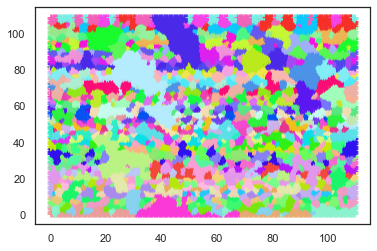

In [298]:
#whole image
plot(raw_data,'+')

In [51]:
# #set grain IDs to zero
# raw_data[:,5]=0
# #random rows for testing voronoi
# random=raw_data[np.random.randint(raw_data.shape[0], size=20), :]
# points=random[:,3:5]
# vor = Voronoi(points)
# fig = voronoi_plot_2d(vor)
# plt.show()

In [52]:
# #slice out coordinates
# samples = raw_data[:,3:5]
# #0.5 is the hexagon size
# neigh = NearestNeighbors(radius=0.5)
# neigh.fit(samples)
# NearestNeighbors(radius=0.5)
# #choose the point to find the neighbors of
# rng = neigh.radius_neighbors([coords[5]])
# #return their indices
# bite=np.asarray(rng[1][0])

In [53]:
# #initialize angles
# euler_one=[0,0,0]
# euler_two=[0,0,0]
# #used in old function
# #previous_row=raw_data[0]
# #keeps track of latest grain
# grain_ID=1
# temp_grain_ID=1
# #keeps track of row ID
# row_ID=0
# #contains all the labeled rows
# row_list=[]
# #slice out coordinates
# samples = raw_data[:,3:5]


# for row in raw_data:
#     #assign first angle
#     euler_one=[row[0],row[1],row[2]]
#     #if the row isn't already part of a grain, give it a new label and sample around it
#     if row[5]==0:
#         #assign to a new grain
#         row[5]=grain_ID
#         #find the six neighboring points
#         neigh = NearestNeighbors(radius=0.5)
#         neigh.fit(samples)
#         NearestNeighbors(radius=0.5)
#         rng = neigh.radius_neighbors([samples[row_ID]])
#         bite=np.asarray(rng[1][0])
#         #sample surrounding pixels
#         for pixel in bite:
#             #assign second angle
#             temp_row=raw_data[pixel]
#             euler_two=[temp_row[0],temp_row[1],temp_row[2]]
#             #if they have a similar orientation, add to the grain 
#             if (misorientation(euler_one,euler_two) <= 15):
#                 row[5]=grain_ID
#                 raw_data[row_ID,5]=grain_ID
#         #go to next row and grain ID
#         row_ID+=1
#         grain_ID+=1

#     #the grain is already part of a growing grain, give it the proper label and sample around it
#     else:
#         #use the prexisting grain ID
#         temp_grain_ID=row[5]
#         #find the six neighboring points
#         neigh = NearestNeighbors(radius=0.5)
#         neigh.fit(samples)
#         NearestNeighbors(radius=0.5)
#         rng = neigh.radius_neighbors([samples[row_ID]])
#         bite=np.asarray(rng[1][0])
#         #sample surrounding pixels
#         for pixel in bite:
#             #assign second angle
#             temp_row=raw_data[pixel]
#             euler_two=[temp_row[0],temp_row[1],temp_row[2]]
#             #if they have a similar orientation, add to the grain 
#             if (misorientation(euler_one,euler_two) <= 15):
#                 row[5]=temp_grain_ID
#                 raw_data[row_ID,5]=temp_grain_ID      
#         #go to next row
#         row_ID+=1
    

        
    
    
    

    

# #     if row[5]==0:
# #         if (misorientation(euler_one,euler_two) <= 15):
# #             row[5]=grain_ID
# #             row_list.append(row)
# #         else:
# #             grain_ID+=1
# #             row[5]=grain_ID
# #             row_list.append(row)


# # row_tuple=tuple(row_list)
# # labeled_data=np.vstack(row_tuple)
# # print(labeled_data)
# # #about 44000 grains...line by line

In [54]:
# # uniquegrains=np.unique(labeled_data[:,5],return_counts=True)
# uniquegrains=np.unique(raw_data[:,5],return_counts=True)
# ID, count = uniquegrains
# params = lognorm.fit(count)
# xvals = np.linspace(0, 200, num=200)
# pdf = lambda x: lognorm.pdf(xvals, *params)
# l = pdf(xvals)
# l[l==0]=[0.000001]

In [55]:
# sns.distplot(count, hist=True, bins=250, kde=True)
# # plt.xlim(0, 25)
# plt.ylim(0, 0.0025)
# plt.title("Grain Size Histogram")
# plt.xlabel('Grain Size')
# plt.ylabel('Frequency')
# #that's the actual...didn't actually operate on the raw data

In [ ]:
#set grain IDs to zero
raw_data[:,5]=0

In [ ]:
#initialize angles
euler_one=[0,0,0]
euler_two=[0,0,0]
#used in old function
#previous_row=raw_data[0]
#keeps track of latest grain
grain_ID=1
temp_grain_ID=1
#keeps track of row ID
row_ID=0
#contains all the labeled rows
row_list=[]
#slice out coordinates
samples = raw_data[:,3:5]


for row in raw_data:
    #assign first angle
    euler_one=[row[0],row[1],row[2]]
    #if the row isn't already part of a grain, give it a new label and sample around it
    if row[5]==0:
        #assign to a new grain
        #row[5]=grain_ID#!
        raw_data[row_ID,5]=grain_ID#!
        #find the six neighboring points
        neigh = NearestNeighbors(radius=0.5)
        neigh.fit(samples)
        NearestNeighbors(radius=0.5)
        rng = neigh.radius_neighbors([samples[row_ID]])
        bite=np.asarray(rng[1][0])
        #sample surrounding pixels
        for pixel in bite:
            #assign second angle
            temp_row=raw_data[pixel]
            euler_two=[temp_row[0],temp_row[1],temp_row[2]]
            #if they have a similar orientation, add to the grain 
            if (misorientation(euler_one,euler_two) <= 15):
                #row[5]=grain_ID#!
                raw_data[pixel,5]=grain_ID#!
        #go to next row and grain ID
        row_ID+=1
        grain_ID+=1

    #the grain is already part of a growing grain, give it the proper label and sample around it
    else:
        #use the prexisting grain ID
        temp_grain_ID=row[5]
        #find the six neighboring points
        neigh = NearestNeighbors(radius=0.5)
        neigh.fit(samples)
        NearestNeighbors(radius=0.5)
        rng = neigh.radius_neighbors([samples[row_ID]])
        bite=np.asarray(rng[1][0])
        #sample surrounding pixels
        for pixel in bite:
            #assign second angle
            temp_row=raw_data[pixel]
            euler_two=[temp_row[0],temp_row[1],temp_row[2]]
            #if they have a similar orientation, add to the grain 
            if (misorientation(euler_one,euler_two) <= 15):
                #row[5]=temp_grain_ID
                raw_data[pixel,5]=temp_grain_ID      
        #go to next row
        row_ID+=1
    

        
    
    
    

    

#     if row[5]==0:
#         if (misorientation(euler_one,euler_two) <= 15):
#             row[5]=grain_ID
#             row_list.append(row)
#         else:
#             grain_ID+=1
#             row[5]=grain_ID
#             row_list.append(row)


# row_tuple=tuple(row_list)
# labeled_data=np.vstack(row_tuple)
# print(labeled_data)
# #about 44000 grains...line by line

In [ ]:
sns.scatterplot(x=raw_data[:,3],y=raw_data[:,4],marker='+',hue=raw_data[:,5],palette=new_cmap)

In [ ]:
sns.scatterplot(x=raw_data[0:16000,3],y=raw_data[0:16000,4],marker='+',hue=raw_data[0:16000,5],palette=new_cmap)

In [ ]:
sns.scatterplot(x=raw_data[0:1000,3],y=raw_data[0:1000,4],marker='+',hue=raw_data[0:1000,5],palette=new_cmap)

In [ ]:
# NotebookApp.iopub_data_rate_limit=1000000.0

In [ ]:
vor_adj=adj_dict(raw_data_sample)

In [ ]:
print(len(vor_adj))

In [ ]:
#voronoi implementation

#set grain IDs to zero
raw_data_sample[:,5]=0
#initialize angles
euler_one=[0,0,0]
euler_two=[0,0,0]
#used in old function
#previous_row=raw_data[0]
#keeps track of latest grain
grain_ID=1
temp_grain_ID=1
#keeps track of row ID
row_ID=0
#contains all the labeled rows
row_list=[]
#slice out coordinates
samples = raw_data_sample[:,3:5]


for row in raw_data_sample:
    #assign first angle
    euler_one=[row[0],row[1],row[2]]
    #if the row isn't already part of a grain, give it a new label and sample around it
    if row[5]==0:
        #assign to a new grain
        raw_data_sample[row_ID,5]=grain_ID#!
        #sample surrounding pixels
        for pixel in vor_adj[row_ID]:
            #assign second angle
            temp_row=raw_data_sample[pixel]
            euler_two=[temp_row[0],temp_row[1],temp_row[2]]
            #if they have a similar orientation, add to the grain 
            if (misorientation(euler_one,euler_two) <= 15):
                raw_data_sample[pixel,5]=grain_ID#!
        #go to next row and grain ID
        row_ID+=1
        grain_ID+=1

    #the grain is already part of a growing grain, give it the proper label and sample around it
    else:
        #use the prexisting grain ID
        temp_grain_ID=row[5]
        #sample surrounding pixels
        for pixel in vor_adj[row_ID]:
            #assign second angle
            temp_row=raw_data_sample[pixel]
            euler_two=[temp_row[0],temp_row[1],temp_row[2]]
            #if they have a similar orientation, add to the grain 
            if (misorientation(euler_one,euler_two) <= 15):
                raw_data_sample[pixel,5]=temp_grain_ID      
        #go to next row
        row_ID+=1

In [ ]:
#result
sns.scatterplot(x=raw_data_sample[:,3],y=raw_data_sample[:,4],marker='o',hue=raw_data_sample[:,5],palette=new_cmap)

In [ ]:
row_ID=0
for row in raw_data_sample:
    euler_one=[row[0],row[1],row[2]]
    combined_grain_ID=row[5]
    temp_row_ID=0
    for temp_row in raw_data_sample:
        euler_two=[temp_row[0],temp_row[1],temp_row[2]]
        if (misorientation(euler_one,euler_two) <= 15):
            raw_data_sample[temp_row_ID,5]=combined_grain_ID 
        temp_row_ID+=1
    row_ID+=1

In [ ]:
#first recombination
sns.scatterplot(x=raw_data_sample[:,3],y=raw_data_sample[:,4],marker='o',hue=raw_data_sample[:,5],palette=new_cmap)

In [56]:
#second recombination
sns.scatterplot(x=raw_data_sample[:,3],y=raw_data_sample[:,4],marker='o',hue=raw_data_sample[:,5],palette=new_cmap)

In [57]:
# #run recursive algorithm
# old_rec_vor(700)
# raw_data_sample_slice=raw_data_sample_copy[np.where(raw_data_sample_copy[:,5] == 1)]
# #print(len(raw_data_sample_slice))
# plt.xlim(0,11)
# plt.ylim(0,11)
# sns.scatterplot(x=raw_data_sample_slice[:,3],y=raw_data_sample_slice[:,4],marker='o')

In [100]:
# #set grain IDs to zero
# raw_data_sample_copy[:,5]=0

# #initialize variables
# start=0
# end=len(raw_data_sample_copy)
# #create array to see what rows have been unassigned
# raw_data_sample_status=np.zeros(len(raw_data_sample_copy))
# grain_ID=1
# row_ID=0

# #keep track of last updated row
# #infinite loop if start doesn't get updated?
# while start < end:
#     row_ID=0
#     #see which rows haven't been assigned
#     for row in raw_data_sample_copy[start:end]:
#         #if no grain ID yet
#         if raw_data_sample_copy[:,5]=0:
#             #build a grain
#             rec_vor(row_ID,grain_ID)
#             start=row_ID
#             break
#         elif 
#         row_ID+=1
        
#     grain_ID+=1

In [101]:
# #start with nucleus
# def rec_vor(row_ID,grain_ID,data_sample,angle):
#     #assign angle
#     euler_one=[data_sample[row_ID,0],data_sample[row_ID,1],data_sample[row_ID,2]]
#     #sample each surrounding point
#     for row_ID_2 in new_vor_adj[row_ID]:
#             #assign second angle
#             euler_two=[data_sample[row_ID_2,0],data_sample[row_ID_2,1],data_sample[row_ID_2,2]]
#             #if they have a similar orientation, add to the grain, recursivly search
#             if (misorientation(euler_one,euler_two) <= angle):
#                 # prevent infinite flip-flop recursion
#                 if data_sample[row_ID_2,5] != grain_ID:
#                     data_sample[row_ID_2,5]=grain_ID
#                     rec_vor(row_ID_2,grain_ID,data_sample,angle)

In [79]:
#start with nucleus
def rec_vor(row_ID,grain_ID,data_sample,angle):
    #assign angle
    euler_one=[data_sample[row_ID,0],data_sample[row_ID,1],data_sample[row_ID,2]]
    #sample each surrounding point
    for row_ID_2 in new_vor_adj[row_ID]:
        #make sure grain grows outwards, 'memoization'
        if data_sample[row_ID_2,5]==0:
            #assign second angle
            euler_two=[data_sample[row_ID_2,0],data_sample[row_ID_2,1],data_sample[row_ID_2,2]]
            #if they have a similar orientation, add to the grain, recursivly search
#             if (misorientation(euler_one,euler_two) <= angle):
            if (disorientation(euler_one, euler_two,hex_sym_ops) <= angle):
                # prevent infinite flip-flop recursion
                if data_sample[row_ID_2,5] != grain_ID:
                    data_sample[row_ID_2,5]=grain_ID
                    rec_vor(row_ID_2,grain_ID,data_sample,angle)
            #label edges
            else:
                data_sample[row_ID,6]=1
                data_sample[row_ID_2,6]=1

In [80]:
#label the grains in an array
def rec_grains(data_sample,angle=15):
    #assign first grain ID
    grain_ID=1
    #set all grains to 0
    data_sample[:,5]=0
    #loop until 
    while True:
        #ID is 0 if unassigned
        unassigned=np.where(data_sample[:,5]==0) 
        #if all grains are assigned
        if len(unassigned[0])==0:
            #returned the labeled array and plot a graph
#             sns.scatterplot(x=data_sample[:,3],y=data_sample[:,4],marker='o',hue=data_sample[:,5],palette=new_cmap)
            return data_sample
        #find first
        row_ID=unassigned[0][0]
        data_sample[row_ID,5]=1
        rec_vor(row_ID,grain_ID,data_sample,angle)
        grain_ID+=1                    

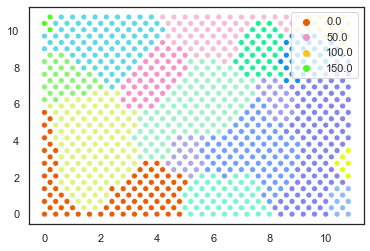

In [62]:
raw_data = np.loadtxt('Raw Data/AZ31B Ecomp 10e0 Int_3 raw1.txt', skiprows=17, usecols=(0,1,2,3,4,8))
raw_data_sample=grain_rect_count(10,10)
sns.scatterplot(x=raw_data_sample[:,3],y=raw_data_sample[:,4],marker='o',hue=raw_data_sample[:,5],palette=new_cmap)

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


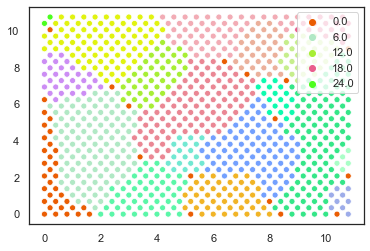

In [74]:
#15 degrees, new
new_vor_adj=adj_dict(raw_data_sample_copy)
labeled_raw_data_sample=rec_grains(raw_data_sample_copy)

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


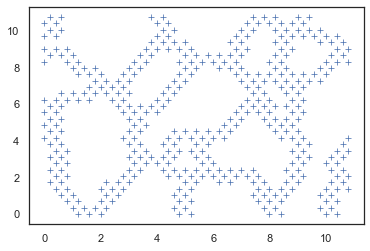

In [81]:
boundaries=np.zeros((len(raw_data_sample_copy),1))
raw_data_sample_copy=np.concatenate((raw_data_sample_copy,boundaries.reshape(-1,1)),axis=1)
labeled_raw_data_sample=rec_grains(raw_data_sample_copy)
raw_data_sample_slice=labeled_raw_data_sample[np.where(labeled_raw_data_sample[:,6]==1)]
sns.scatterplot(x=raw_data_sample_slice[:,3],y=raw_data_sample_slice[:,4],marker='+')

In [ ]:
labeled_raw_data_sample

In [105]:
# #15 degrees, old
# start = time.time()
# labeled_raw_data_sample=rec_grains(raw_data_sample_copy)
# end = time.time()
# print(end - start)

In [106]:
# labeled_raw_data_sample=rec_grains(raw_data_sample_copy,20)

In [107]:
# labeled_raw_data_sample=rec_grains(raw_data_sample_copy,50)

In [108]:
#grain labeling doesnt change much with misorient, but labeling does?
#color only by orientation

In [109]:
#running it twice doesn't change anything
# labeled_raw_data_sample_two=rec_grains(labeled_raw_data_sample)

In [131]:
#add parameter/for loop that allows you to recombine multiple times
def combine_grains(data_sample,len1,len2):
    #do we need row ID, or just use np.where, use max to find #of rows, then iterate
    data_sample_copy=np.copy(data_sample)
    row_ID=0
    for row in data_sample[0:len1]:
        #assign first angle
        euler_one=[row[0],row[1],row[2]]
        #use ID of point for combine grain
        combined_grain_ID=row[5]
        #go through all other grains
        temp_row_ID=0
        #compare to all other points
        #problem: flip flops, instead reassign all rather than one by one
        #maybe reverse array and go through again
        #is this the wrong way? Say two grains have similar misorientations, but aren't adjacent... 
        for temp_row in data_sample[0:len2]:
            euler_two=[temp_row[0],temp_row[1],temp_row[2]]
            if (disorientation(euler_one,euler_two,sym_ops) <= 15):
                temp_grain_ID=temp_row[5]
                #data_sample[temp_row_ID,5]=combined_grain_ID 
#                 temp_array=data_sample[np.where(data_sample[:,5]==temp_grain_ID)]
#                 temp_array[:,5]=combined_grain_ID
                data_sample[np.where(data_sample[:,5]==temp_grain_ID),5]=combined_grain_ID
            temp_row_ID+=1
        row_ID+=1
        
    sns.scatterplot(x=data_sample[:,3],y=data_sample[:,4],marker='o',hue=data_sample[:,5],palette=new_cmap)
    return data_sample 

In [132]:
print(len(labeled_raw_data_sample))

880


C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


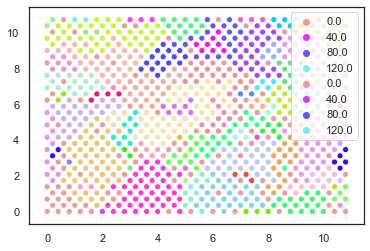

In [133]:
labeled_raw_data_sample_copy=np.copy(labeled_raw_data_sample)
combine_grains(labeled_raw_data_sample_copy,1,880)
sns.scatterplot(x=labeled_raw_data_sample_copy[:,3],y=labeled_raw_data_sample_copy[:,4],marker='o',hue=labeled_raw_data_sample_copy[:,5],palette=new_cmap)

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


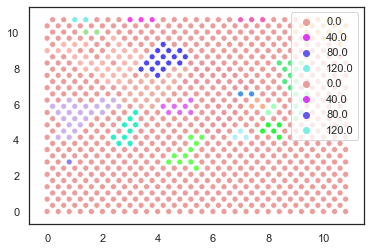

In [134]:
labeled_raw_data_sample_copy=np.copy(labeled_raw_data_sample)
combine_grains(labeled_raw_data_sample_copy,110,880)
sns.scatterplot(x=labeled_raw_data_sample_copy[:,3],y=labeled_raw_data_sample_copy[:,4],marker='o',hue=labeled_raw_data_sample_copy[:,5],palette=new_cmap)

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


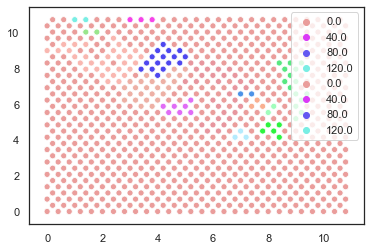

In [135]:
labeled_raw_data_sample_copy=np.copy(labeled_raw_data_sample)
combine_grains(labeled_raw_data_sample_copy,220,880)
sns.scatterplot(x=labeled_raw_data_sample_copy[:,3],y=labeled_raw_data_sample_copy[:,4],marker='o',hue=labeled_raw_data_sample_copy[:,5],palette=new_cmap)

In [137]:
# labeled_raw_data_sample_copy=np.copy(labeled_raw_data_sample)
# combine_grains(labeled_raw_data_sample_copy,440,880)
# sns.scatterplot(x=labeled_raw_data_sample_copy[:,3],y=labeled_raw_data_sample_copy[:,4],marker='o',hue=labeled_raw_data_sample_copy[:,5],palette=new_cmap)

In [138]:
# labeled_raw_data_sample_copy=np.copy(labeled_raw_data_sample)
# combine_grains(labeled_raw_data_sample_copy,880,880)
# sns.scatterplot(x=labeled_raw_data_sample_copy[:,3],y=labeled_raw_data_sample_copy[:,4],marker='o',hue=labeled_raw_data_sample_copy[:,5],palette=new_cmap)

In [ ]:
plt.hist(labeled_raw_data_sample[:,5], bins='auto')
print(len(labeled_raw_data_sample))
#one grain ID, later on is very prevalent, perhaps this approach just builds giant blobs since it doesn't include a dist metric
#first see if broken, then think about approach, maybe plot hist of misorientations

In [ ]:
#compare misorientations inside grains and between grains to see why combine_grains forms a blob 

In [ ]:
#actual
plot(raw_data_sample,'o')

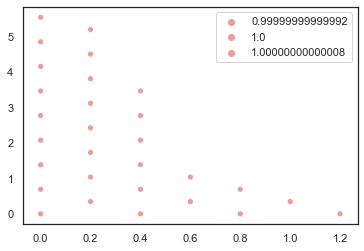

In [120]:
raw_data_sample_slice_one=raw_data_sample[np.where(raw_data_sample[:,5]==1)]
plot(raw_data_sample_slice_one,'o')
#print(raw_data_sample_slice_intra)

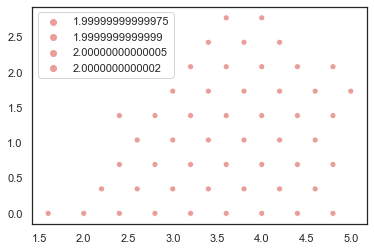

In [121]:
raw_data_sample_slice_two=raw_data_sample[np.where(raw_data_sample[:,5]==2)]
plot(raw_data_sample_slice_two,'o')
#print(raw_data_sample_slice_intra)

In [122]:
#same color, different grain ID! Need a new colormap!

In [123]:
print(raw_data_sample_slice_one)

[[4.7313  2.67202 0.88482 0.      0.      1.     ]
 [4.7313  2.67202 0.88482 0.4     0.      1.     ]
 [4.7313  2.67202 0.88482 0.8     0.      1.     ]
 [4.7313  2.67202 0.88482 1.2     0.      1.     ]
 [4.7313  2.67202 0.88482 0.2     0.34641 1.     ]
 [4.7313  2.67202 0.88482 0.6     0.34641 1.     ]
 [4.7313  2.67202 0.88482 1.      0.34641 1.     ]
 [4.75805 2.66381 0.90778 0.      0.69282 1.     ]
 [4.72948 2.66724 0.87434 0.4     0.69282 1.     ]
 [4.72948 2.66724 0.87434 0.8     0.69282 1.     ]
 [4.72948 2.66724 0.87434 0.2     1.03923 1.     ]
 [4.72948 2.66724 0.87434 0.6     1.03923 1.     ]
 [1.56702 0.46935 0.18275 0.      1.38564 1.     ]
 [1.56062 0.46842 4.37558 0.4     1.38564 1.     ]
 [1.56062 0.46842 4.37558 0.2     1.73205 1.     ]
 [1.56536 0.4703  4.37198 0.      2.07846 1.     ]
 [1.56062 0.46842 4.37558 0.4     2.07846 1.     ]
 [1.57934 0.47181 4.35742 0.2     2.42487 1.     ]
 [1.54023 0.46801 4.39907 0.      2.77128 1.     ]
 [1.56365 0.46493 0.17849 0.4  

(array([150.,   0.,   0.,   0.,   0.,   0.,  52.,   0.,   0., 204.]),
 array([  0.        ,  17.99324483,  35.98648966,  53.97973449,
         71.97297932,  89.96622415, 107.95946897, 125.9527138 ,
        143.94595863, 161.93920346, 179.93244829]),
 <a list of 10 Patch objects>)

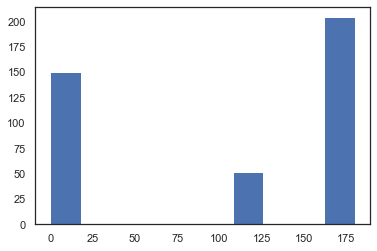

In [154]:
#intragrain misorientations
intra=[]
iter_one=range(0,len(raw_data_sample_slice_one))
comb_one=itertools.combinations(iter_one, 2)

for x in comb_one:
    euler_one=[raw_data_sample_slice_one[x[0]][0],raw_data_sample_slice_one[x[0]][1],raw_data_sample_slice_one[x[0]][2]]
    euler_two=[raw_data_sample_slice_one[x[1]][0],raw_data_sample_slice_one[x[1]][1],raw_data_sample_slice_one[x[1]][2]]
#     intra.append(disorientation(euler_one,euler_two,sym_ops))
    intra.append(standard_misorientation(euler_one,euler_two))

plt.hist(intra, bins='auto')    

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


(array([150.,   0.,   0.,   0., 193.,  44.,   0.,   0.,   0.,  19.]),
 array([ 0.        ,  6.0625855 , 12.12517101, 18.18775651, 24.25034201,
        30.31292752, 36.37551302, 42.43809852, 48.50068402, 54.56326953,
        60.62585503]),
 <a list of 10 Patch objects>)

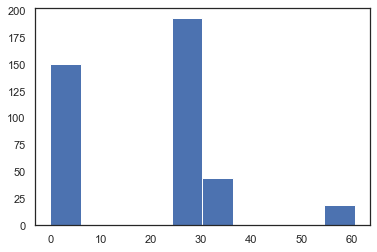

In [170]:
#intragrain disorientations - cubic
intra=[]
iter_one=range(0,len(raw_data_sample_slice_one))
combine=itertools.combinations(iter_one, 2)

for x in combine:
    euler_one=[raw_data_sample_slice_one[x[0]][0],raw_data_sample_slice_one[x[0]][1],raw_data_sample_slice_one[x[0]][2]]
    euler_two=[raw_data_sample_slice_one[x[1]][0],raw_data_sample_slice_one[x[1]][1],raw_data_sample_slice_one[x[1]][2]]
#     intra.append(disorientation(euler_one,euler_two,sym_ops))
    intra.append(disorientation(euler_one,euler_two,cubic_sym_ops))

plt.hist(intra, bins='auto')    

(array([37.,  7., 40., 76., 81., 48.,  8., 50., 14., 17., 10.,  0.,  5.,
        12.,  0.,  0.,  0.,  1.]),
 array([0.        , 0.16916365, 0.33832729, 0.50749094, 0.67665458,
        0.84581823, 1.01498187, 1.18414552, 1.35330916, 1.52247281,
        1.69163645, 1.8608001 , 2.02996374, 2.19912739, 2.36829103,
        2.53745468, 2.70661832, 2.87578197, 3.04494561]),
 <a list of 18 Patch objects>)

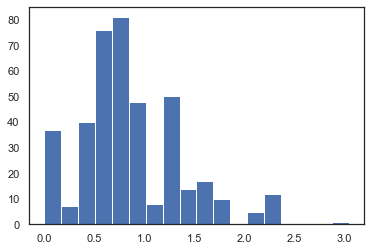

In [182]:
#intragrain disorientations - hex
intra=[]
iter_one=range(0,len(raw_data_sample_slice_one))
combine=itertools.combinations(iter_one, 2)

for x in combine:
    euler_one=[raw_data_sample_slice_one[x[0]][0],raw_data_sample_slice_one[x[0]][1],raw_data_sample_slice_one[x[0]][2]]
    euler_two=[raw_data_sample_slice_one[x[1]][0],raw_data_sample_slice_one[x[1]][1],raw_data_sample_slice_one[x[1]][2]]
    intra.append(disorientation(euler_one,euler_two,hex_sym_ops))

plt.hist(intra, bins='auto')    

In [125]:
#due to symmetry, can't be more than 62.8, however this is inside one grain! still should not be more than 15
#is the zero bar with self?

(array([  9.,   5.,  16.,  50.,  52.,  57., 117., 100., 111., 148., 130.,
        134., 127., 126., 117., 110.,  80.,   8.,   5.,   6.]),
 array([89.54421064, 89.65028565, 89.75636067, 89.86243568, 89.9685107 ,
        90.07458571, 90.18066073, 90.28673574, 90.39281076, 90.49888577,
        90.60496079, 90.71103581, 90.81711082, 90.92318584, 91.02926085,
        91.13533587, 91.24141088, 91.3474859 , 91.45356091, 91.55963593,
        91.66571094]),
 <a list of 20 Patch objects>)

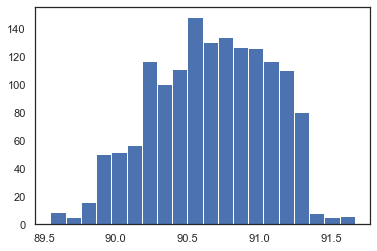

In [186]:
#intergrain misorientations
inter=[]

#create indices for arrays
iter_one=range(0,len(raw_data_sample_slice_one))
iter_two=range(0,len(raw_data_sample_slice_two))
#cartesian product
product=itertools.product(iter_one, iter_two)

# print(len(raw_data_sample_slice_one))
# print(len(raw_data_sample_slice_two))
# for x in product:
#     print(x)

for x in product:
    euler_one=[raw_data_sample_slice_one[x[0]][0],raw_data_sample_slice_one[x[0]][1],raw_data_sample_slice_one[x[0]][2]]
    euler_two=[raw_data_sample_slice_two[x[1]][0],raw_data_sample_slice_two[x[1]][1],raw_data_sample_slice_two[x[1]][2]]
    inter.append(disorientation(euler_one,euler_two,hex_sym_ops))

plt.hist(inter, bins='auto')    

In [407]:
print(np.mean(inter))

90.66178329611118


In [ ]:
def avg_intergrain_disorient(grain_slice_one,grain_slice_two,plot=False):
    inter=[]

    #create indices for arrays
    iter_one=range(0,len(raw_data_sample_slice_one))
    iter_two=range(0,len(raw_data_sample_slice_two))
    #cartesian product
    product=itertools.product(iter_one, iter_two)

    for x in product:
        euler_one=[grain_slice_one[x[0]][0],grain_slice_one[x[0]][1],grain_slice_one[x[0]][2]]
        euler_two=[grain_slice_two[x[1]][0],grain_slice_two[x[1]][1],grain_slice_two[x[1]][2]]
        inter.append(disorientation(euler_one,euler_two,hex_sym_ops))
    
    if plot==True:
        #plot
        plt.hist(inter, bins='auto')   
    
    #return mean disorientation
    return np.mean(inter)

In [248]:
# boundaries=[]
# for x in range (0,len(raw_data)-1):
#     y=x+1
#     euler_one=[raw_data[x][0],raw_data[x][1],raw_data[x][2]]
#     euler_two=[raw_data[y][0],raw_data[y][1],raw_data[y][2]]
#     horizontal_disorient=disorientation(euler_one,euler_two,hex_sym_ops)
#     if horizontal_disorient > 15:
#         boundaries.append(horizontal_disorient)
#         raw_data_and_boundaries[x,6]=1
#         raw_data_and_boundaries[y,6]=1
        
# print(raw_data_and_boundaries)

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


[[4.7313000e+00 2.6720200e+00 8.8482000e-01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.7313000e+00 2.6720200e+00 8.8482000e-01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 [4.7313000e+00 2.6720200e+00 8.8482000e-01 ... 0.0000000e+00
  1.0000000e+00 0.0000000e+00]
 ...
 [2.8347900e+00 1.7241300e+00 6.2164700e+00 ... 1.0946561e+02
  1.1120000e+03 1.0000000e+00]
 [2.8058800e+00 1.7047300e+00 6.2102500e+00 ... 1.0946561e+02
  1.1120000e+03 0.0000000e+00]
 [2.8244200e+00 1.7240300e+00 6.2053000e+00 ... 1.0946561e+02
  1.1120000e+03 0.0000000e+00]]


In [347]:
# boundaries=[]
# for x in range (0,len(raw_data)-1):
#     y=x+1
#     euler_one=[raw_data[x][0],raw_data[x][1],raw_data[x][2]]
#     euler_two=[raw_data[y][0],raw_data[y][1],raw_data[y][2]]
#     horizontal_disorient=disorientation(euler_one,euler_two,hex_sym_ops)
#     if horizontal_disorient > 15:
#         boundaries.append(horizontal_disorient)
#         raw_data_and_boundaries[x,6]=1
#         raw_data_and_boundaries[y,6]=1
        
# print(raw_data_and_boundaries)

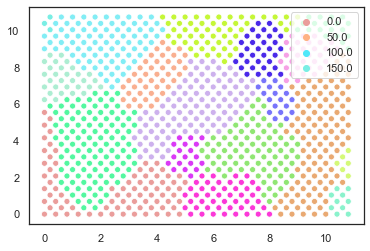

In [253]:
sns.scatterplot(x=raw_data_sample[:,3],y=raw_data_sample[:,4],marker='o',hue=raw_data_sample[:,5],palette=new_cmap)

In [ ]:
#weight boundary misorientation hist by the lenghth of the respective voronoi boundary

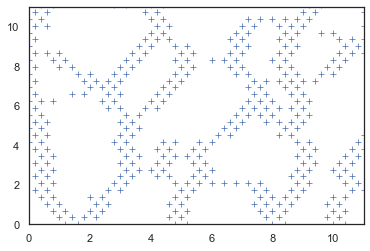

In [254]:
plt.xlim(0,11)
plt.ylim(0,11)
sns.scatterplot(x=raw_data_and_boundaries_slice[:,3],y=raw_data_and_boundaries_slice[:,4],marker='+')

(array([ 591.,  740.,  844.,  971., 1082.,  871.,  764.,  612.,  577.,
         499.,  473.,  469.,  595.,  598.,  658.,  542.,  687.,  677.,
         565.,  798.,  913., 1019.,  284.]),
 array([15.00215383, 18.40810192, 21.81405   , 25.21999808, 28.62594616,
        32.03189424, 35.43784233, 38.84379041, 42.24973849, 45.65568657,
        49.06163465, 52.46758274, 55.87353082, 59.2794789 , 62.68542698,
        66.09137506, 69.49732315, 72.90327123, 76.30921931, 79.71516739,
        83.12111548, 86.52706356, 89.93301164, 93.33895972]),
 <a list of 23 Patch objects>)

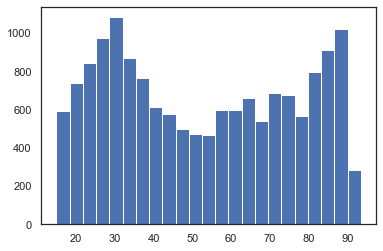

In [200]:
plt.hist(boundaries, bins='auto') 

In [ ]:
#mean and variance of grain size dist
#js divergence grain boundary dist


#predicting if a point is a boundary
#random sample and and find disorient dist

In [375]:
boundaries=np.zeros((len(raw_data),1))
raw_data_and_boundaries=np.concatenate((raw_data,boundaries.reshape(-1,1)),axis=1)

In [376]:
modified_vor_adj=mod_adj_dict(raw_data_and_boundaries)
# print(sum(map(len, modified_vor_adj.values())))

In [377]:
boundaries=[]
for key in modified_vor_adj:
    euler_one=[raw_data[key][0],raw_data[key][1],raw_data[key][2]]
    for value in modified_vor_adj[key]:
        euler_two=[raw_data[value][0],raw_data[value][1],raw_data[value][2]]
        vor_disorient=disorientation(euler_one,euler_two,hex_sym_ops)
        if 0 <vor_disorient < 360:
            boundaries.append(vor_disorient)
            raw_data_and_boundaries[key,6]=1
            raw_data_and_boundaries[value,6]=1

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


In [372]:
# raw_data_and_boundaries_slice=raw_data_and_boundaries[np.where(raw_data_and_boundaries[:,6]==1)]

In [374]:
# plt.xlim(0,11)
# plt.ylim(0,11)
# sns.scatterplot(x=raw_data_and_boundaries_slice[:,3],y=raw_data_and_boundaries_slice[:,4],marker='+')

In [11]:
def mod_adj_dict(data):
    coords=data[:,[3,4]]
    tri=Delaunay(coords)
    neigh=defaultdict(set)
    for p in tri.simplices:
        for i,j in itertools.combinations(p,2):
            neigh[i].add(j)
            #remove to prevent duplicates
#             neigh[j].add(i)
    return neigh

In [385]:
#plot js divergence of boundary dist
def random_boundaries(array,binsize=249,boundary_plot=False,hist=False):
    boundaries=np.zeros((len(array),1))
    raw_data_and_boundaries=np.concatenate((array,boundaries.reshape(-1,1)),axis=1)
    
    #create ajd dict
    modified_vor_adj=mod_adj_dict(array)
    
    #create list of boundary disorientations
    boundaries=[]
    for key in modified_vor_adj:
        euler_one=[array[key][0],array[key][1],array[key][2]]
        for value in modified_vor_adj[key]:
            euler_two=[raw_data[value][0],array[value][1],array[value][2]]
            vor_disorient=disorientation(euler_one,euler_two,hex_sym_ops)
            if vor_disorient > 15:
                boundaries.append(vor_disorient)
                raw_data_and_boundaries[key,6]=1
                raw_data_and_boundaries[value,6]=1
    
    if boundary_plot==True:
        raw_data_and_boundaries_slice=raw_data_and_boundaries[np.where(raw_data_and_boundaries[:,6]==1)]
        plt.xlim(0,11)
        plt.ylim(0,11)
        sns.scatterplot(x=raw_data_and_boundaries_slice[:,3],y=raw_data_and_boundaries_slice[:,4],marker='+')
    
    if hist==True:
        plt.hist(boundaries, bins='auto') 
        
    

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


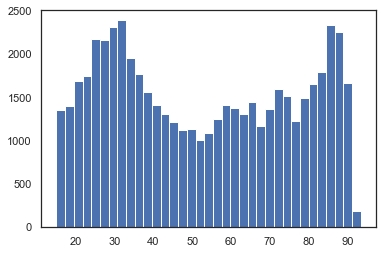

In [386]:
random_boundaries(raw_data)

(array([1.209e+03, 1.138e+03, 2.361e+03, ..., 2.000e+00, 0.000e+00,
        2.000e+00]),
 array([1.20741827e-06, 5.38118127e-02, 1.07622418e-01, ...,
        9.33614013e+01, 9.34152119e+01, 9.34690225e+01]),
 <a list of 1737 Patch objects>)

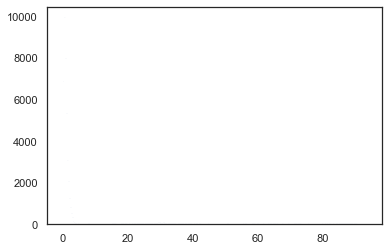

In [378]:
plt.hist(boundaries, bins='auto') 

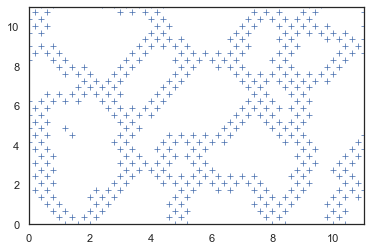

In [343]:
plt.xlim(0,11)
plt.ylim(0,11)
sns.scatterplot(x=raw_data_and_boundaries_slice[:,3],y=raw_data_and_boundaries_slice[:,4],marker='+')

In [16]:
def grain_boundary_areas(grain_ID):
    grain_boundaries=raw_data_and_boundaries_slice[np.where(raw_data_and_boundaries_slice[:,6]==1)]
#     for grain_ID in raw_data_and_boundaries_slice[:,6]:
    grain_ID=1
    grain_boundary=raw_data_and_boundaries_slice[np.where(raw_data_and_boundaries_slice[:,5]==grain_ID)]
        


    plt.xlim(0,11)
    plt.ylim(0,11)
    sns.scatterplot(x=grain_boundary[:,3],y=grain_boundary[:,4],marker='+')

In [18]:
print(raw_data)

[[4.7313000e+00 2.6720200e+00 8.8482000e-01 0.0000000e+00 0.0000000e+00
  1.0000000e+00]
 [4.7313000e+00 2.6720200e+00 8.8482000e-01 4.0000000e-01 0.0000000e+00
  1.0000000e+00]
 [4.7313000e+00 2.6720200e+00 8.8482000e-01 8.0000000e-01 0.0000000e+00
  1.0000000e+00]
 ...
 [2.8347900e+00 1.7241300e+00 6.2164700e+00 1.0880000e+02 1.0946561e+02
  1.1120000e+03]
 [2.8058800e+00 1.7047300e+00 6.2102500e+00 1.0920000e+02 1.0946561e+02
  1.1120000e+03]
 [2.8244200e+00 1.7240300e+00 6.2053000e+00 1.0960000e+02 1.0946561e+02
  1.1120000e+03]]


In [29]:
from shapely.geometry import Polygon
# coords  = ((-1, 0), (-1, 1), (0, 0.5), (1, 1), (1, 0), (-1, 0))
coords=np.array([[0,0],[1,0],[1,1],[0,1]])
#takes np array, must be CC
polygon = Polygon(coords)
area=polygon.area
print(area)

1.0


(array([1361., 1398., 1695., 1753., 2180., 2162., 2317., 2395., 1962.,
        1778., 1568., 1411., 1305., 1216., 1120., 1133., 1011., 1092.,
        1258., 1416., 1378., 1306., 1454., 1171., 1366., 1597., 1524.,
        1226., 1501., 1661., 1795., 2338., 2255., 1664.,  192.]),
 array([15.00215383, 17.24406437, 19.4859749 , 21.72788543, 23.96979597,
        26.2117065 , 28.45361703, 30.69552757, 32.9374381 , 35.17934863,
        37.42125917, 39.6631697 , 41.90508023, 44.14699077, 46.3889013 ,
        48.63081183, 50.87272237, 53.1146329 , 55.35654343, 57.59845397,
        59.8403645 , 62.08227503, 64.32418557, 66.5660961 , 68.80800663,
        71.04991717, 73.2918277 , 75.53373823, 77.77564877, 80.0175593 ,
        82.25946983, 84.50138037, 86.7432909 , 88.98520143, 91.22711197,
        93.4690225 ]),
 <a list of 35 Patch objects>)

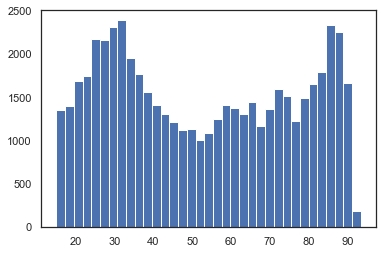

In [307]:
plt.hist(boundaries, bins='auto') 

In [356]:
boundaries=[]
for key in modified_vor_adj:
    euler_one=[raw_data[key][0],raw_data[key][1],raw_data[key][2]]
    for value in modified_vor_adj[key]:
        euler_two=[raw_data[value][0],raw_data[value][1],raw_data[value][2]]
        vor_disorient=disorientation(euler_one,euler_two,hex_sym_ops)
        if 0 <= vor_disorient <= 360:
            print(vor_disorient)
            boundaries.append(vor_disorient)
#             raw_data_and_boundaries[key,6]=1
#             raw_data_and_boundaries[value,6]=1

C:\Users\GREEN\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in arccos


In [360]:
print(boundaries)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [357]:
# plt.xlim(0,11)
# plt.ylim(0,11)
# sns.scatterplot(x=raw_data_and_boundaries_slice[:,3],y=raw_data_and_boundaries_slice[:,4],marker='+')

In [358]:
print(boundaries)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(array([6.7789e+04, 5.6800e+02, 1.2080e+03, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+00]),
 array([0.00000000e+00, 4.07627660e-02, 8.15255321e-02, ...,
        9.33874970e+01, 9.34282597e+01, 9.34690225e+01]),
 <a list of 2293 Patch objects>)

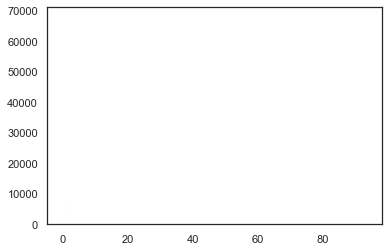

In [359]:
plt.hist(boundaries, bins='auto') 

In [326]:
def js_divergence_scipy(hist1,hist2):
    #square distance to find divergence, use log2
    return (distance.jensenshannon(hist1, hist2, base=2))**2

In [391]:
#plot js divergence of boundary dist
def boundary_hist(array,binsize=249,boundary_plot=False,hist=False):
    boundaries=np.zeros((len(array),1))
    raw_data_and_boundaries=np.concatenate((array,boundaries.reshape(-1,1)),axis=1)
    
    #create ajd dict
    modified_vor_adj=mod_adj_dict(array)
    
    #create list of boundary disorientations
    boundaries=[]
    for key in modified_vor_adj:
        euler_one=[array[key][0],array[key][1],array[key][2]]
        for value in modified_vor_adj[key]:
            euler_two=[raw_data[value][0],array[value][1],array[value][2]]
            vor_disorient=disorientation(euler_one,euler_two,hex_sym_ops)
            if vor_disorient > 0:
#                 print('yee')
                boundaries.append(vor_disorient)
                raw_data_and_boundaries[key,6]=1
                raw_data_and_boundaries[value,6]=1
    
    #for sample=10000 len boundaries=37521
#     print(str(len(boundaries)))
    
    if boundary_plot==True:
        raw_data_and_boundaries_slice=raw_data_and_boundaries[np.where(raw_data_and_boundaries[:,6]==1)]
        plt.xlim(0,11)
        plt.ylim(0,11)
        sns.scatterplot(x=raw_data_and_boundaries_slice[:,3],y=raw_data_and_boundaries_slice[:,4],marker='+')
    
    if hist==True:
        plt.hist(boundaries, bins='auto') 
        return boundaries
        
#     q_hist, q_bin_edges = np.histogram(boundaries, bins=np.arange(binsize), range=(0,250), density=True)
#     q_hist = np.append(q_hist, 0)
#     q=q_hist
#     q[q==0]=[0.0000000000001]
#     return q

    #if none, return zeros?

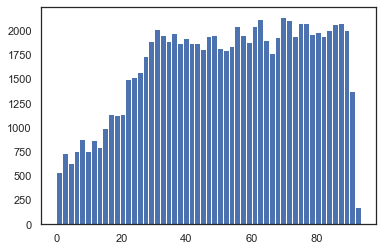

In [404]:
bound=boundary_hist(raw_data_slice,hist=True)

In [402]:
raw_data_slice=raw_data[0::4]

In [403]:
print(len(raw_data_slice))

21755


(array([1779., 2235., 2400., 3118., 4067., 4944., 5516., 5427., 5339.,
        5368., 5167., 5537., 5782., 5367., 5867., 5726., 5579., 5823.,
        1633.]),
 array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80,
        85, 90, 95]),
 <a list of 19 Patch objects>)

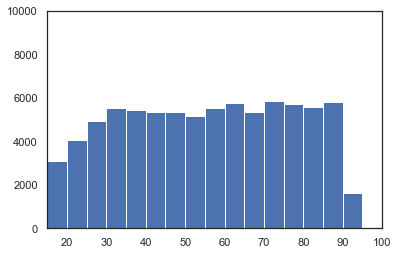

In [406]:
plt.ylim(0,10000)
plt.xlim(15,100)
plt.hist(bound,bins=range(0,100,5)) 

In [ ]:
#inspect grain boundary dist (suspiciously low js div)

In [13]:
#plot js divergence of boundary dist
def boundaries(array,binsize=249,boundary_plot=False,hist=False):    
    boundaries=np.zeros((len(array),1))
    raw_data_and_boundaries=np.concatenate((array,boundaries.reshape(-1,1)),axis=1)
    
    #create ajd dict
    modified_vor_adj=mod_adj_dict(array)
    
    #create list of boundary disorientations
    boundaries=[]
    for key in modified_vor_adj:
        euler_one=[array[key][0],array[key][1],array[key][2]]
        for value in modified_vor_adj[key]:
            euler_two=[array[value][0],array[value][1],array[value][2]]
            vor_disorient=disorientation(euler_one,euler_two,hex_sym_ops)
            if vor_disorient > 15:
                boundaries.append(vor_disorient)
                raw_data_and_boundaries[key,6]=1
                raw_data_and_boundaries[value,6]=1
    
    if boundary_plot==True:
        raw_data_and_boundaries_slice=raw_data_and_boundaries[np.where(raw_data_and_boundaries[:,6]==1)]
        plt.xlim(0,11)
        plt.ylim(0,11)
        sns.scatterplot(x=raw_data_and_boundaries_slice[:,3],y=raw_data_and_boundaries_slice[:,4],marker='+')